# Visualizing and statistical testing 

## Import necessary packages

In [2]:
# Import essential modules
import os
import pandas as pd
import FrozenPy.functions as fp

## Loading data in long format

In [10]:
# read .out files from data directory
data_dir = '/Users/home/Documents/Jupyter/my-modules/FrozenPy/Examples/data'
os.chdir(data_dir)

Cond_BL_df = pd.read_csv('Conditioning_BL_long.csv')
Ext_BL_df = pd.read_csv('Extinction_BL_long.csv')
Ret_BL_df = pd.read_csv('Retrieval_BL_long.csv')

display(Cond_BL_df.head())
display(Ext_BL_df.head())
display(Ret_BL_df.head())

Cond_Trials_df = pd.read_csv('Conditioning_Trials_long.csv')
Ext_Trials_df = pd.read_csv('Extinction_Trials_long.csv')
Ret_Trials_df = pd.read_csv('Retrieval_Trials_long.csv')

display(Cond_Trials_df.head())
display(Ext_Trials_df.head())
display(Ret_Trials_df.head())

,Unnamed: 0,ID,Group,Sex,BL
0,0,Rat1,A,Male,0.000000
1,1,Rat2,A,Male,0.555556
2,2,Rat3,A,Male,0.000000
3,3,Rat4,A,Male,1.333333
4,4,Rat5,A,Male,0.555556


,Unnamed: 0,ID,Group,Sex,BL
0,0,Rat1,A,Male,1.333333
1,1,Rat2,A,Male,4.333333
2,2,Rat3,A,Male,6.111111
3,3,Rat4,A,Male,5.777778
4,4,Rat5,A,Male,1.777778


,Unnamed: 0,ID,Group,Sex,BL
0,0,Rat1,A,Male,0.000000
1,1,Rat2,A,Male,1.555556
2,2,Rat3,A,Male,2.666667
3,3,Rat4,A,Male,0.000000
4,4,Rat5,A,Male,1.111111


,Unnamed: 0,ID,Group,Sex,Trial,CS,US,ISI
0,0,Rat1,A,Male,1,0.0,0.0,0.000000
1,1,Rat1,A,Male,2,30.0,10.0,2.413793
2,2,Rat1,A,Male,3,20.0,0.0,10.344828
3,3,Rat1,A,Male,4,12.0,50.0,15.517241
4,4,Rat1,A,Male,5,80.0,40.0,26.206897


,Unnamed: 0,ID,Group,Sex,Trial,CS,US,ISI
0,0,Rat1,A,Male,1,20.0,NaN,5.333333
1,1,Rat1,A,Male,2,0.0,NaN,0.000000
2,2,Rat1,A,Male,3,42.0,NaN,4.666667
3,3,Rat1,A,Male,4,18.0,NaN,17.333333
4,4,Rat1,A,Male,5,14.0,NaN,12.666667


,Unnamed: 0,ID,Group,Sex,Trial,CS,US,ISI
0,0,Rat1,A,Male,1,16.0,NaN,0.000000
1,1,Rat1,A,Male,2,10.0,NaN,8.666667
2,2,Rat1,A,Male,3,12.0,NaN,3.333333
3,3,Rat1,A,Male,4,0.0,NaN,11.333333
4,4,Rat1,A,Male,5,0.0,NaN,4.666667


# Plotting using Seaborn

https://seaborn.pydata.org/index.html#

__Future__

[ ] Loop through plotting
[ ] Plot Trial Blocks

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot formatting
%matplotlib inline
sns.set(style="ticks", color_codes=True)

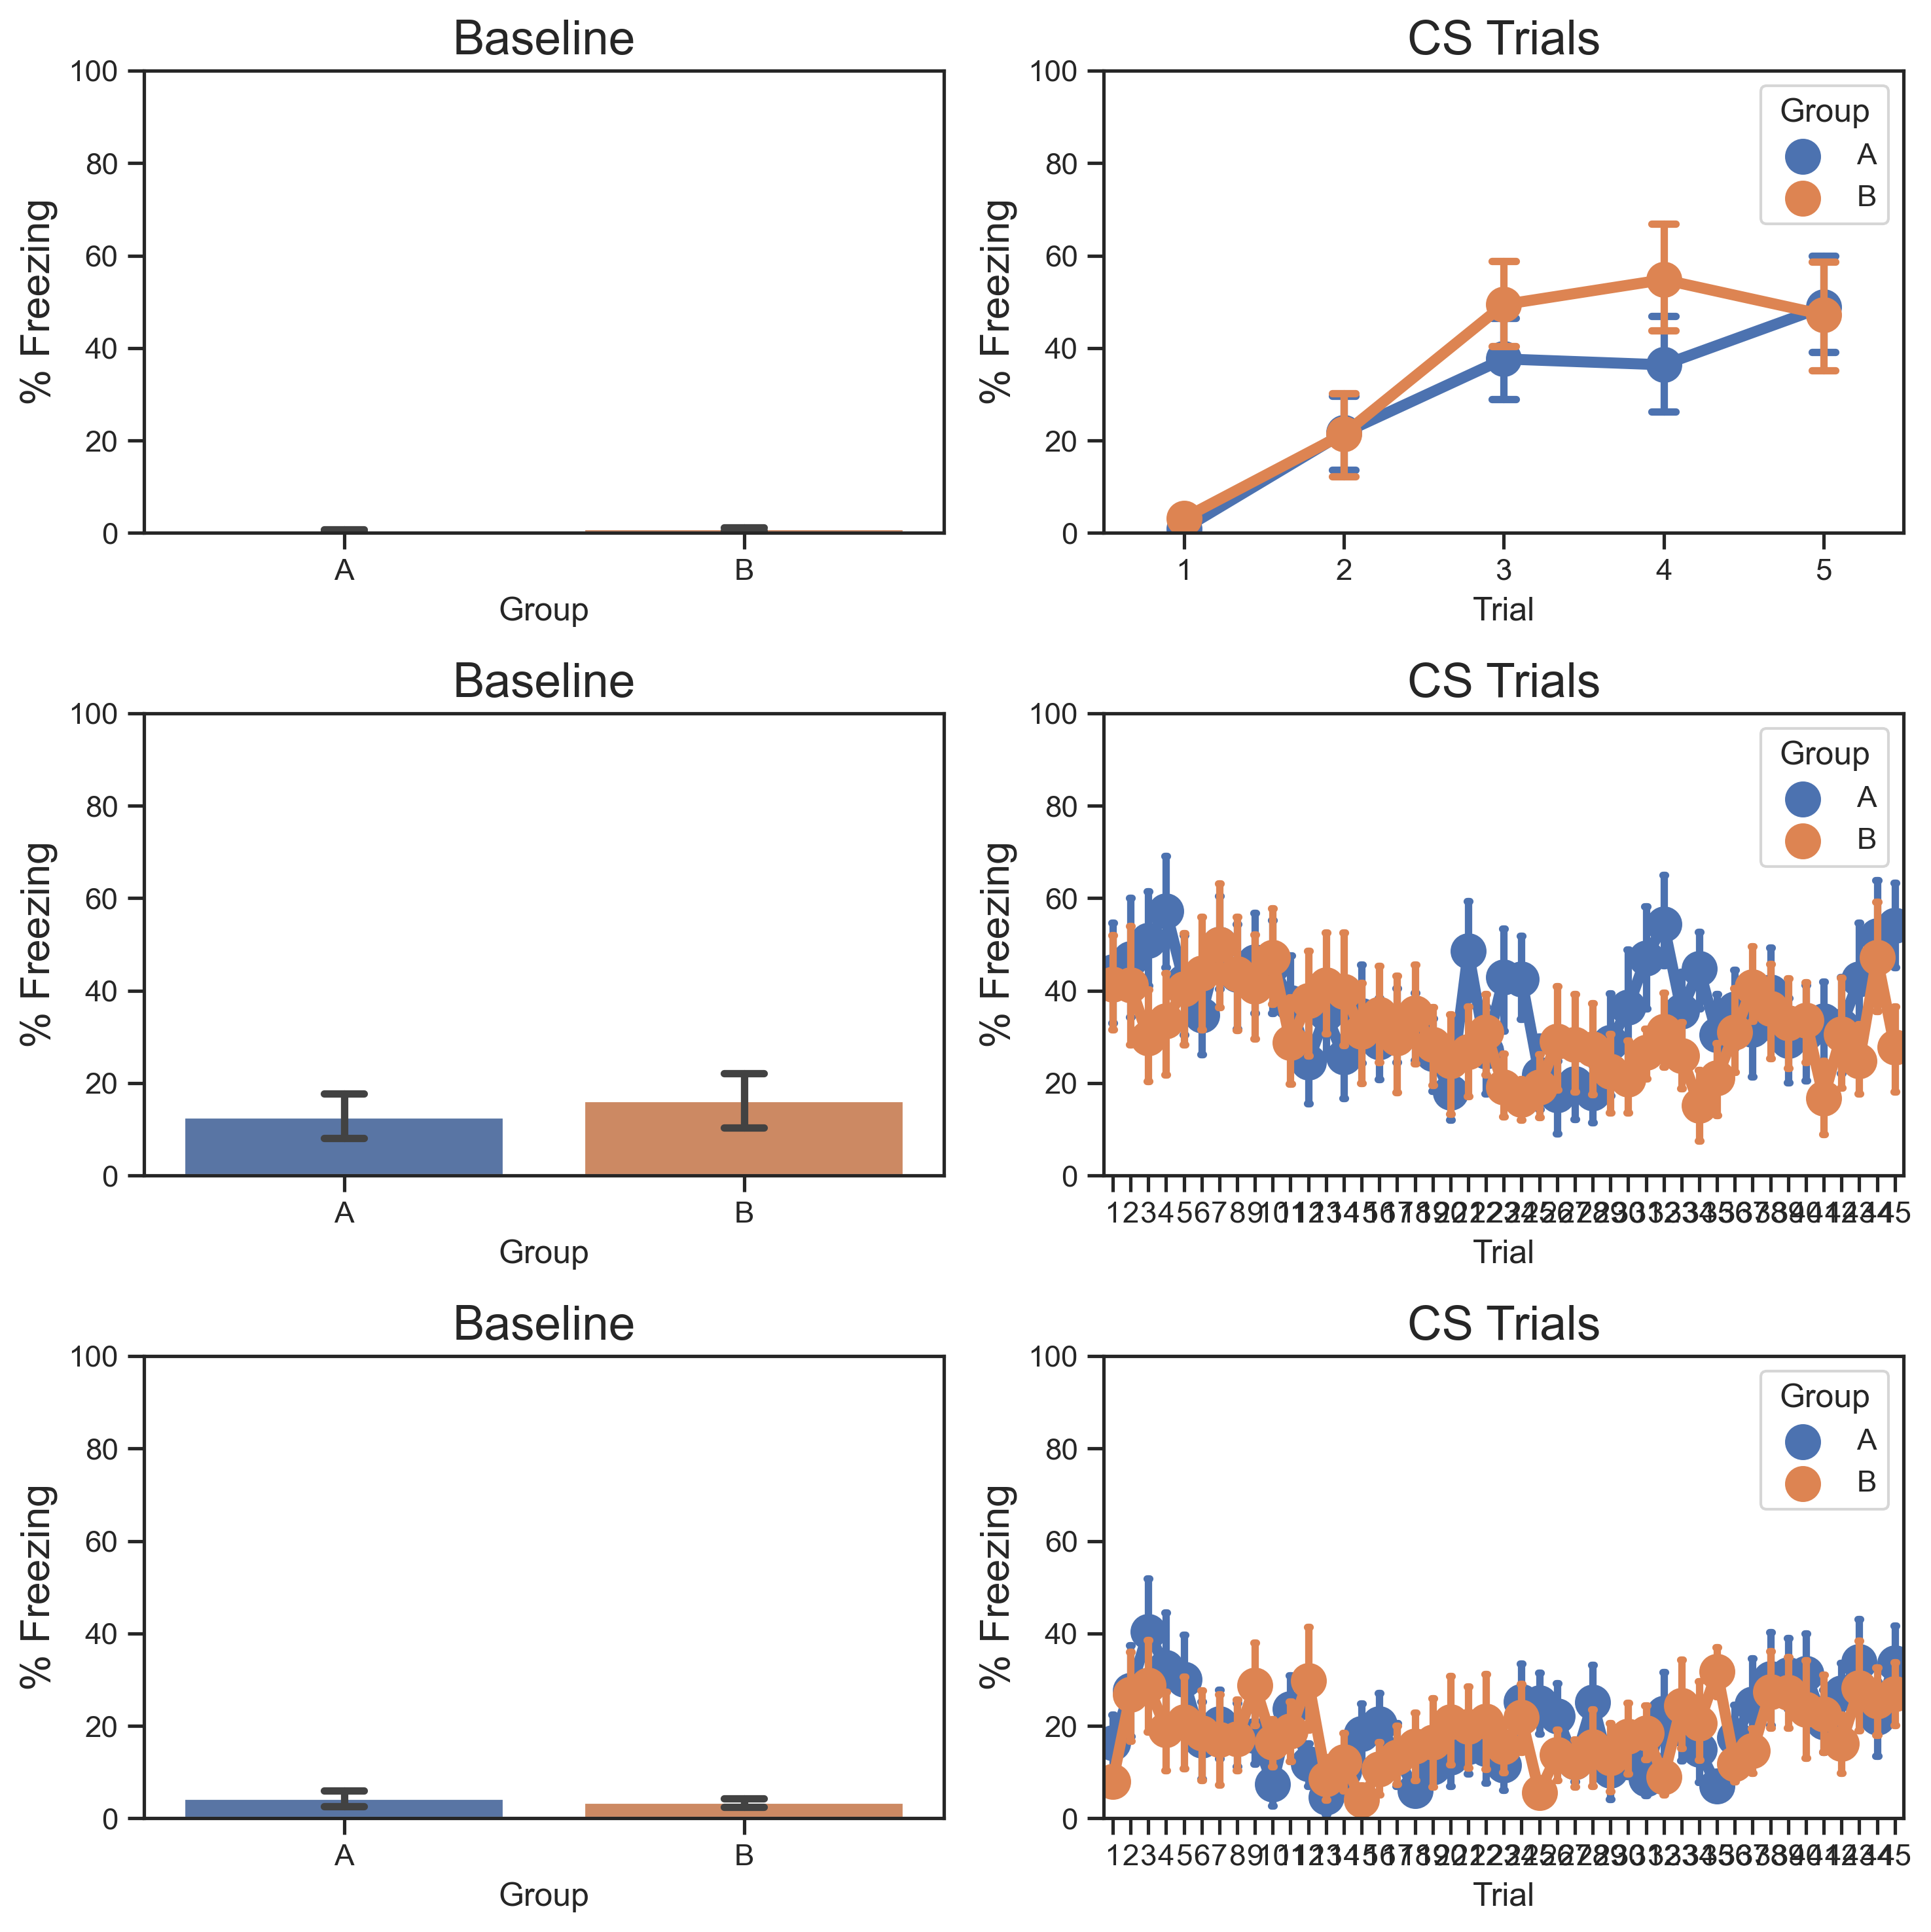

In [14]:
# fig size and resolution
plt.figure(figsize=[10, 10], dpi=300)

# === Conditioning ===
plt.subplot(3, 2, 1) 
sns.barplot(data=Cond_BL_df, # baseline
            x='Group', 
            y='BL', 
            ci=68, 
            capsize=.1)
plt.ylim(0, 100)
plt.ylabel('% Freezing', fontsize=15)
plt.title('Baseline', fontsize=17.5)

plt.subplot(3, 2, 2) 
sns.pointplot(data=Cond_Trials_df, # trials
              x='Trial',
              y='CS',
              hue='Group',
              scale=1.5,
              ci=68,
              capsize=.15)
plt.ylim(0, 100)
plt.ylabel('% Freezing', fontsize=15)
plt.title('CS Trials', fontsize=17.5)

#  === Extinction ===
plt.subplot(3, 2, 3) # baseline
sns.barplot(data=Ext_BL_df, 
            x='Group', 
            y='BL', 
            ci=68, 
            capsize=.1)
plt.ylim(0, 100)
plt.ylabel('% Freezing', fontsize=15)
plt.title('Baseline', fontsize=17.5)

plt.subplot(3, 2, 4) # trials
sns.pointplot(data=Ext_Trials_df,
              x='Trial',
              y='CS',
              hue='Group',
              scale=1.5,
              ci=68,
              capsize=.15)
plt.ylim(0, 100)
plt.ylabel('% Freezing', fontsize=15)
plt.title('CS Trials', fontsize=17.5)

#  === Retrieval ===
plt.subplot(3, 2, 5) # baseline
sns.barplot(data=Ret_BL_df, 
            x='Group', 
            y='BL', 
            ci=68, 
            capsize=.1)
plt.ylim(0, 100)
plt.ylabel('% Freezing', fontsize=15)
plt.title('Baseline', fontsize=17.5)

plt.subplot(3, 2, 6) # trials
sns.pointplot(data=Ret_Trials_df,
              x='Trial',
              y='CS',
              hue='Group',
              scale=1.5,
              ci=68,
              capsize=.15)
plt.ylim(0, 100)
plt.ylabel('% Freezing', fontsize=15)
plt.title('CS Trials', fontsize=17.5)
plt.tight_layout()

# save figure
plt.savefig('Example_figure.png')